In [1]:
import sys
sys.path.append('src')
from cobra import flux_analysis
from flux_components.flux_sampler import FluxSampler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from uncertainties import nominal_value, std_dev

fsampler = FluxSampler()

In [2]:
from flux_components.flux_component_analysis import FluxComponentAnalysis
fca = FluxComponentAnalysis()
meta_df = fca.meta_df
meta_df = meta_df[meta_df['absolute flux?'] == 1]

flux_df = fca.flux_df.loc[meta_df.index, :]
flux_df.drop([
    "redox",
    "respiration",
    "aceA_aceB",
    "mgsA",
], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pint/quantity.py:1377 UnitStrippedWarning: The unit of the quantity is stripped.


In [3]:
# calculate relative fluxes
ecoli_meta_df = meta_df[(meta_df.species == 'E. coli') & (meta_df.medium == 'M9 + glucose')]
ecoli_flux_df = flux_df.loc[ecoli_meta_df.index, :]
rel_ecoli_flux_df = ecoli_flux_df.div(ecoli_flux_df['im_glc'].apply(nominal_value), axis=0)

ValueError: setting an array element with a sequence.

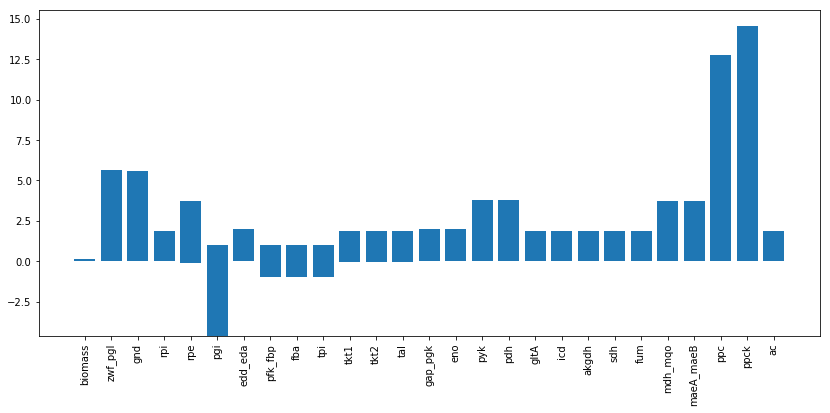

In [4]:
fva_df = fsampler.fva_all_reactions()
rxn_to_drop = set(fva_df.index).difference(flux_df.columns)
fva_df.drop(rxn_to_drop, axis=0, inplace=True)
fva_df = fva_df[fva_df.minimum < fva_df.maximum]

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.bar(range(fva_df.shape[0]), height=(fva_df.maximum - fva_df.minimum)+2e-2, bottom=fva_df.minimum-1e-2)
ax.set_xticks([i for i in range(fva_df.shape[0])])
ax.set_xticklabels(fva_df.index, rotation=90);
ax.plot(rel_ecoli_flux_df[fva_df.index].applymap(nominal_value).transpose(), 'y.');

In [5]:
rel_ecoli_flux_df[fva_df.index].applymap(nominal_value).transpose()

serial_number                                1    \
reaction                                           
biomass        (0.0643 +/- 0.0019) dimensionless   
zwf_pgl          (0.289 +/- 0.015) dimensionless   
gnd              (0.231 +/- 0.014) dimensionless   
rpi            (0.1264 +/- 0.0033) dimensionless   
rpe            (0.1048 +/- 0.0027) dimensionless   
pgi              (0.707 +/- 0.029) dimensionless   
edd_eda          (0.058 +/- 0.011) dimensionless   
pfk_fbp          (0.808 +/- 0.032) dimensionless   
fba              (0.808 +/- 0.032) dimensionless   
tpi              (0.808 +/- 0.032) dimensionless   
tkt1             (0.064 +/- 0.005) dimensionless   
tkt2             (0.041 +/- 0.004) dimensionless   
tal              (0.064 +/- 0.005) dimensionless   
gap_pgk            (1.71 +/- 0.07) dimensionless   
eno                (1.59 +/- 0.07) dimensionless   
pyk                (1.29 +/- 0.05) dimensionless   
pdh                (1.21 +/- 0.06) dimensionless   
gltA               (0.27 +/- 0.06) dimensionless   
icd                (0.27 +/- 0.06) dimensionless   
akgdh              (0.19 +/- 0.06) dimensionless   
sdh                (0.19 +/- 0.06) dimensionless   
fum                (0.19 +/- 0.06) dimensionless   
mdh_mqo          (0.134 +/- 0.027) dimensionless   
maeA_maeB          (0.06 +/- 0.04) dimensionless   
ppc                (0.25 +/- 0.07) dimensionless   
ppck                   (0.0 +/- 0) dimensionless   
ac                 (0.79 +/- 0.05) dimensionless   

serial_number                                2    \
reaction                                           
biomass          (0.079 +/- 0.005) dimensionless   
zwf_pgl            (0.21 +/- 0.09) dimensionless   
gnd                (0.21 +/- 0.04) dimensionless   
rpi            (0.1369 +/- 0.0024) dimensionless   
rpe            (0.0747 +/- 0.0013) dimensionless   
pgi                (0.78 +/- 0.09) dimensionless   
edd_eda           (-0.00 +/- 0.10) dimensionless   
pfk_fbp            (0.85 +/- 0.09) dimensionless   
fba                (0.85 +/- 0.09) dimensionless   
tpi                (0.85 +/- 0.09) dimensionless   
tkt1             (0.050 +/- 0.015) dimensionless   
tkt2             (0.024 +/- 0.015) dimensionless   
tal              (0.050 +/- 0.015) dimensionless   
gap_pgk            (1.72 +/- 0.09) dimensionless   
eno                (1.57 +/- 0.08) dimensionless   
pyk                (1.27 +/- 0.09) dimensionless   
pdh                (1.08 +/- 0.09) dimensionless   
gltA             (0.283 +/- 0.033) dimensionless   
icd                (0.28 +/- 0.06) dimensionless   
akgdh              (0.19 +/- 0.06) dimensionless   
sdh              (0.190 +/- 0.029) dimensionless   
fum              (0.190 +/- 0.029) dimensionless   
mdh_mqo          (0.165 +/- 0.030) dimensionless   
maeA_maeB          (0.02 +/- 0.04) dimensionless   
ppc                (0.25 +/- 0.05) dimensionless   
ppck                   (0.0 +/- 0) dimensionless   
ac                 (0.62 +/- 0.10) dimensionless   

serial_number                              3    \
reaction                                         
biomass        (0.072 +/- 0.004) dimensionless   
zwf_pgl        (0.297 +/- 0.026) dimensionless   
gnd            (0.245 +/- 0.022) dimensionless   
rpi            (0.136 +/- 0.008) dimensionless   
rpe            (0.109 +/- 0.007) dimensionless   
pgi              (0.70 +/- 0.06) dimensionless   
edd_eda        (0.052 +/- 0.011) dimensionless   
pfk_fbp          (0.80 +/- 0.07) dimensionless   
fba              (0.80 +/- 0.07) dimensionless   
tpi              (0.80 +/- 0.07) dimensionless   
tkt1           (0.068 +/- 0.007) dimensionless   
tkt2           (0.041 +/- 0.006) dimensionless   
tal            (0.068 +/- 0.007) dimensionless   
gap_pgk          (1.69 +/- 0.15) dimensionless   
eno              (1.56 +/- 0.15) dimensionless   
pyk              (1.26 +/- 0.11) dimensionless   
pdh              (1.13 +/- 0.13) dimensionless   
gltA             (0.23 +/- 0.10)

In [ ]:
fva_df